In [2]:
import numpy as np
import sympy as sp
from scipy.constants import epsilon_0,mu_0,c
import matplotlib.pyplot as plt

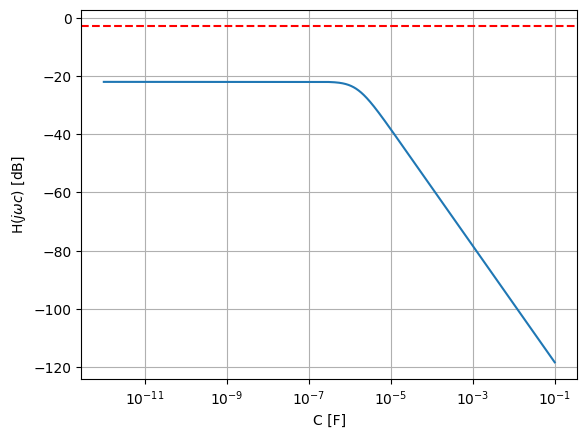

C is approx= 1.2000737073062885e-07


In [25]:
# Beregning af input impedans for operationsforstærker kredsløbet
V=5
I=0.2
Z_in = V/I
L1 = 11.75e-3 # Induktansen af receiver-spole
R1 = 41.9 # Ohmsk modstand af receiver-spole
R2 = Z_in # Input impedans
f_c = 4200 #Cutoff-frekvens
w_c = 2*np.pi*f_c
C = np.logspace(-12, -1, 10000) # Cutoff-frekvensen holdes fast og kapacitansen "sweepes"

Zl = 1j*w_c*L1
Zc = 1/(1j*w_c*C)

Zshunt = 1/(1/Zc + 1/R2)

H = Zshunt / (R1 + Zl + Zshunt)

H_dB = 20*np.log10(np.abs(H))

plt.figure()
plt.semilogx(C, H_dB)
plt.axhline(-3, linestyle="--", color='r')
plt.xlabel("C [F]")
plt.ylabel("H$(j\omega c) $ [dB]")
plt.grid(True)
plt.show()

def C_attenuation(C, H_dB, level=-3):
    idx = np.argmin(np.abs(H_dB - level))
    return C[idx]

C_cut = C_attenuation(C, H_dB)
print("C is approx=", C_cut)
